In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

Text(0, 0.5, 'sigmoid')

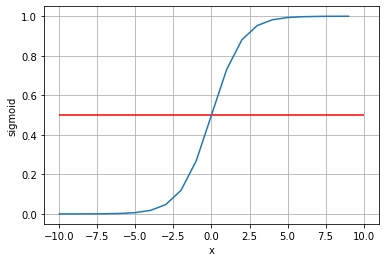

In [2]:
def sigmoid(x_val):
    sigmoid = (1/(1+np.exp(-x_val)))
    return(sigmoid)

x_val = np.arange(-10,10)
y_val = sigmoid(x_val)

plt.plot(x_val,y_val)
plt.hlines(y=0.5,xmin=-10,xmax=10,color='red')
plt.grid()
plt.xlabel("x")
plt.ylabel("sigmoid")

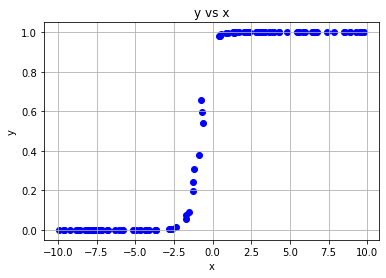

In [17]:
np.random.seed(0)

x = np.random.uniform(-10,10,100)
y = sigmoid(2 + 3*x.reshape(-1,1) + np.random.rand(100,1))

y_class = np.random.binomial(n=1,p=y)

x_with_const = sm.add_constant(x)

plt.figure(figsize=(6,4))
plt.scatter(x,y,color='blue')
#plt.hlines(y=0.5,xmin=min(x),xmax=max(x),color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show()

Cost function for Logistic function

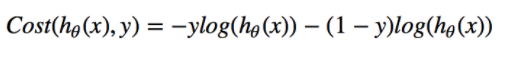

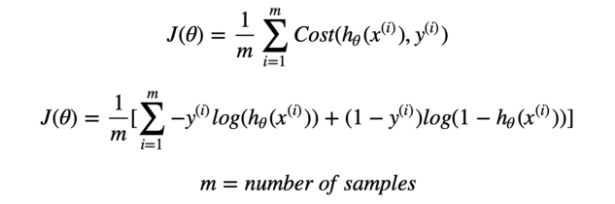

In [18]:
theta = np.random.rand(2,1)
n_iter = 2000
alpha = 0.01
tol = 1e-6

def cost_func(y,H_theta):
    J = 0
    y = y.reshape(1,-1)[0]
    H_theta = H_theta.reshape(1,-1)[0]
    m = len(y)
    for i in range(len(y)):
        J += (- y[i]*np.log(H_theta[i]) - (1-y[i])*np.log(1-H_theta[i]))/m
    
    return(J)

def gradient_des(x,y,theta,alpha,n_iter,tol):
    cost_func_hist = np.zeros((n_iter))
    theta_hist = np.zeros((n_iter,2))
    for iter in range(n_iter):
        H_theta = sigmoid(x.dot(theta))
        gradient = np.dot(x.T,(H_theta-y))
        update = (alpha/len(x))*gradient
        
        if np.all(np.abs(update) <= tol):
            print('Reached tolerance value')
            break
            
        theta = theta - update
        cost_func_hist[iter] = cost_func(y,H_theta)
        theta_hist[iter] = theta.reshape(1,2)
    return(theta,theta_hist,cost_func_hist)

theta_GD,theta_hist,cost_func_hist = gradient_des(x_with_const,y_class.reshape(-1,1),theta,alpha,n_iter,tol)

prob_GD = sigmoid(np.dot(x_with_const,theta_GD)) # calculation of probability

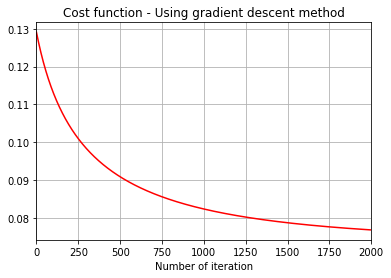

In [19]:
plt.figure(figsize=(6,4))
plt.plot(list(np.arange(n_iter)),cost_func_hist,'r-')
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('')
plt.title('Cost function - Using gradient descent method')
plt.xlim(0,2000)
plt.show()

In [20]:
## Prediction of class

class_pred = []
for i in range(len(prob_GD)):
    if prob_GD[i][0] < 0.5:
        class_pred.append(0)
    else:
        class_pred.append(1)
        
## Confusion Matrix
confusion_matrix(y_class,class_pred)

array([[49,  1],
       [ 2, 48]], dtype=int64)

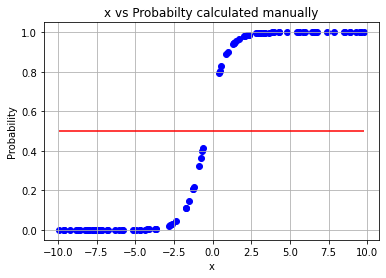

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(x,prob_GD,color='blue')
plt.hlines(y=0.5,xmin=min(x),xmax=max(x),color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('x vs Probabilty calculated manually')
plt.show()

#### Prediction using sklearn

In [26]:
from sklearn.linear_model import LogisticRegression

clf_model = LogisticRegression(random_state=0) # Model initialization
clf_model.fit(x.reshape(-1,1),y_class.reshape(1,-1)[0]) # Model fit
y_hat = clf_model.predict(x.reshape(-1,1)) # Prediction
prob_sklearn = clf_model.predict_proba(x.reshape(-1,1)) # Prediction of probability
# Model evaluation
confusion_matrix(y_class,y_hat)

array([[49,  1],
       [ 2, 48]], dtype=int64)

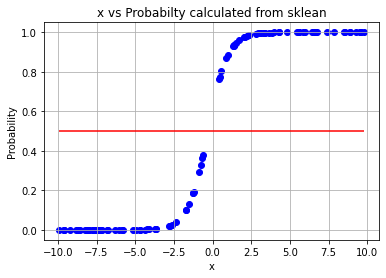

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(x,prob_sklearn[:,1],color='blue')
plt.hlines(y=0.5,xmin=min(x),xmax=max(x),color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('x vs Probabilty calculated from sklean')
plt.show()